In [2]:
import numpy as np
import matplotlib.pylab as plt
import math
import scipy.stats as sps
import pandas as pd
import seaborn as sns

%matplotlib inline

# Условное математическое ожидание

Прочитаем данные

In [3]:
data = pd.read_csv("6.csv.xls",
                   skiprows=3,
                   dtype=np.float64,
                   names=["Время отключения"]) #это наши данные об отключениях
pd.read_csv("6.csv.xls", names=["Важные переменные"])[:3]

,Важные переменные
0,lambda = 95
1,t_0 = 500
2,t = 100000


In [4]:
distribution_lambda = 1/95.
time_step = 500
whole_time = 100000
N = whole_time // time_step #общее количество временнных интервалов
time_step = np.float32(time_step)
off_N = 1000 #число отключений

Посчитаем количество отключений через каждые time_step секунд

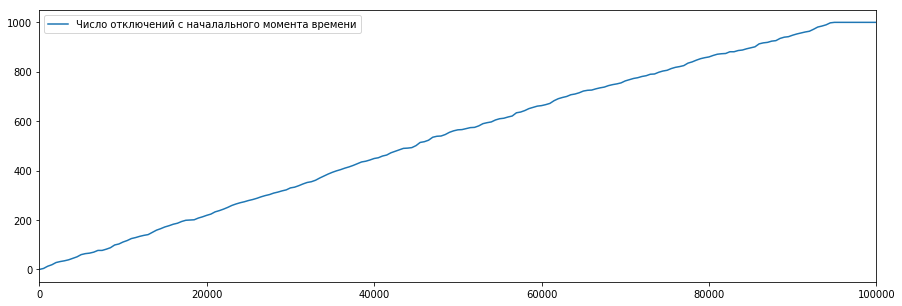

In [5]:
turn_off_numbers = []
turn_off_times = []
for i in range(N + 1):
    off_times = 0
    for j in data.values:
        if time_step * i > j:
            off_times += 1
        else:
            break
    turn_off_numbers.append(off_times)
    turn_off_times.append(time_step * i)
turn_off_data = pd.DataFrame({"Число отключений с началального момента времени" : turn_off_numbers}, index=turn_off_times)
turn_off_data.plot(figsize = (15, 5))
plt.show()

Посчитаем матожидание, требуемое в задаче.

$$E(N_t|N_s) = E(N_t - N_s + N_s|N_s) = \text{\ $N_t - N_s$ и $N_s$ независимы \ } = E(N_t - N_s) + E(N_s|N_s) = E(N_t - N_s) + N_s = \\ = \text{\ } N_t-N_s \sim Pois(\lambda(t-s)) \text{ \ } = \lambda(t-s) + N_s$$

Исходя из этой формулы, мы теперь можем посчитать предполагаемое количество сломанных серверов. Сделаем это.

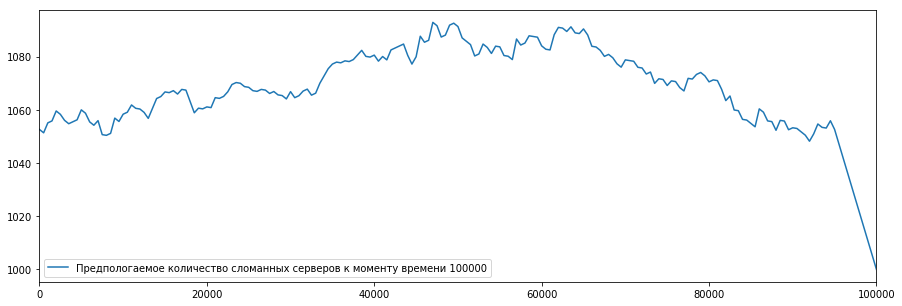

Максимальное значение:1092.89473684.
Значение в конце:1000.0.


In [6]:
needed_number_of_servers = []
for i in range(N + 1):
    needed_number_of_servers.append((distribution_lambda * (whole_time - time_step * i))+
                                    turn_off_data["Число отключений с началального момента времени"][time_step * i])
needed_servers_data = pd.DataFrame({"Предпологаемое количество сломанных серверов к моменту времени " + str(whole_time) : needed_number_of_servers}, index=turn_off_times)
needed_servers_data.plot(figsize = (15, 5))
plt.show()
print("Максимальное значение:" + str(max(needed_number_of_servers)) + ".")
print("Значение в конце:" + str(needed_number_of_servers[-1]) + ".")

Отметим, что за всё время предсказанное значение не откланилось больше, чем на 9,3% от эмпирического. И равняется эмпирическому в конце.